In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from importlib import reload
import functions_model_eval_val as f
reload(f)

<module 'functions_model_eval_val' from 'e:\\Pima-Diabetes-Prediction\\notebooks\\functions_model_eval_val.py'>

In [2]:
df = pd.read_csv('../data/processed/data_remove_yes_balance_yes_scale_no.csv')

## Model Optimization

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='outcome'), df['outcome'], test_size=0.2, random_state=42)

### Hyperparameter Tuning

In [4]:
param_grids = {
    "LogisticRegression": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"],
        "max_iter": [100, 200, 300],
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
        "leaf_size": [20, 30, 40]
    },
    "DecisionTreeClassifier": {
        "max_depth": [None, 5, 10, 15, 20],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [None, 10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False],
        "criterion": ["gini", "entropy", "log_loss"],
    },
    "GaussianNB": {
        "var_smoothing": [1e-9, 1e-8, 1e-7]
    },
    "BaggingClassifier": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.75, 1.0],
        "max_features": [0.5, 1.0],
        "bootstrap": [True, False]
    },
    "GradientBoostingClassifier": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1.0]
    },
    "AdaBoostClassifier": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.5, 1.0, 1.5]
    },
    "XGBClassifier": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
        "scale_pos_weight": [1, 2, 5, 10]  # Para clases desbalanceadas
    },
    "LGBMClassifier": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.05, 0.1],
        "num_leaves": [15, 31, 63],
        "boosting_type": ["gbdt", "dart"],
        "feature_fraction": [0.8, 1.0],
    }
}

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "BaggingClassifier": BaggingClassifier(
        estimator=DecisionTreeClassifier()
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(
        estimator=DecisionTreeClassifier()
    ),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(verbose=-1)
}

In [7]:
classification_metrics_pro, proba_predictions_dict_pro, models_pro = f.classification_hyperparameter_tuning(x_train, y_train, x_test, y_test, models, param_grids, n_iter=100, cv=5, scoring='recall')

Tuning hyperparameters for LogisticRegression...
Best hyperparameters for LogisticRegression:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.001} 

Tuning hyperparameters for KNeighborsClassifier...
Best hyperparameters for KNeighborsClassifier:
{'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan', 'leaf_size': 20} 

Tuning hyperparameters for DecisionTreeClassifier...
Best hyperparameters for DecisionTreeClassifier:
{'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'} 

Tuning hyperparameters for RandomForestClassifier...
Best hyperparameters for RandomForestClassifier:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 15, 'criterion': 'gini', 'bootstrap': True} 

Tuning hyperparameters for GaussianNB...
Best hyperparameters for GaussianNB:
{'var_smoothing': 1e-09} 

Tuning hyperparameters for BaggingClassifier...
Best hyperparameters for BaggingClassifier:
{'n_estimat

e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for XGBClassifier:
{'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8} 

Tuning hyperparameters for LGBMClassifier...
Best hyperparameters for LGBMClassifier:
{'num_leaves': 15, 'n_estimators': 50, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'boosting_type': 'dart'} 



### Model Evaluation (Pro)

#### Classification Metrics

In [16]:
classification_metrics_pro.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC
3,RandomForestClassifier Pro,0.841837,0.806452,0.852273,0.828729,0.922980,0.920000
5,BaggingClassifier Pro,0.836735,0.791667,0.863636,0.826087,0.918403,0.915286
4,GaussianNB Pro,0.836735,0.804348,0.840909,0.822222,0.932976,0.930321
6,GradientBoostingClassifier Pro,0.836735,0.804348,0.840909,0.822222,0.922033,0.924778
9,LGBMClassifier Pro,0.826531,0.775510,0.863636,0.817204,0.924505,0.921892
1,KNeighborsClassifier Pro,0.816327,0.795455,0.795455,0.795455,0.883996,0.860402
2,DecisionTreeClassifier Pro,0.811224,0.849315,0.704545,0.770186,0.866425,0.836323
7,AdaBoostClassifier Pro,0.755102,0.696078,0.806818,0.747368,0.759891,0.648343
0,LogisticRegression Pro,0.709184,0.637168,0.818182,0.716418,0.819760,0.803874
8,XGBClassifier Pro,0.448980,0.448980,1.000000,0.619718,0.921717,0.923264


#### Confusion Matrix

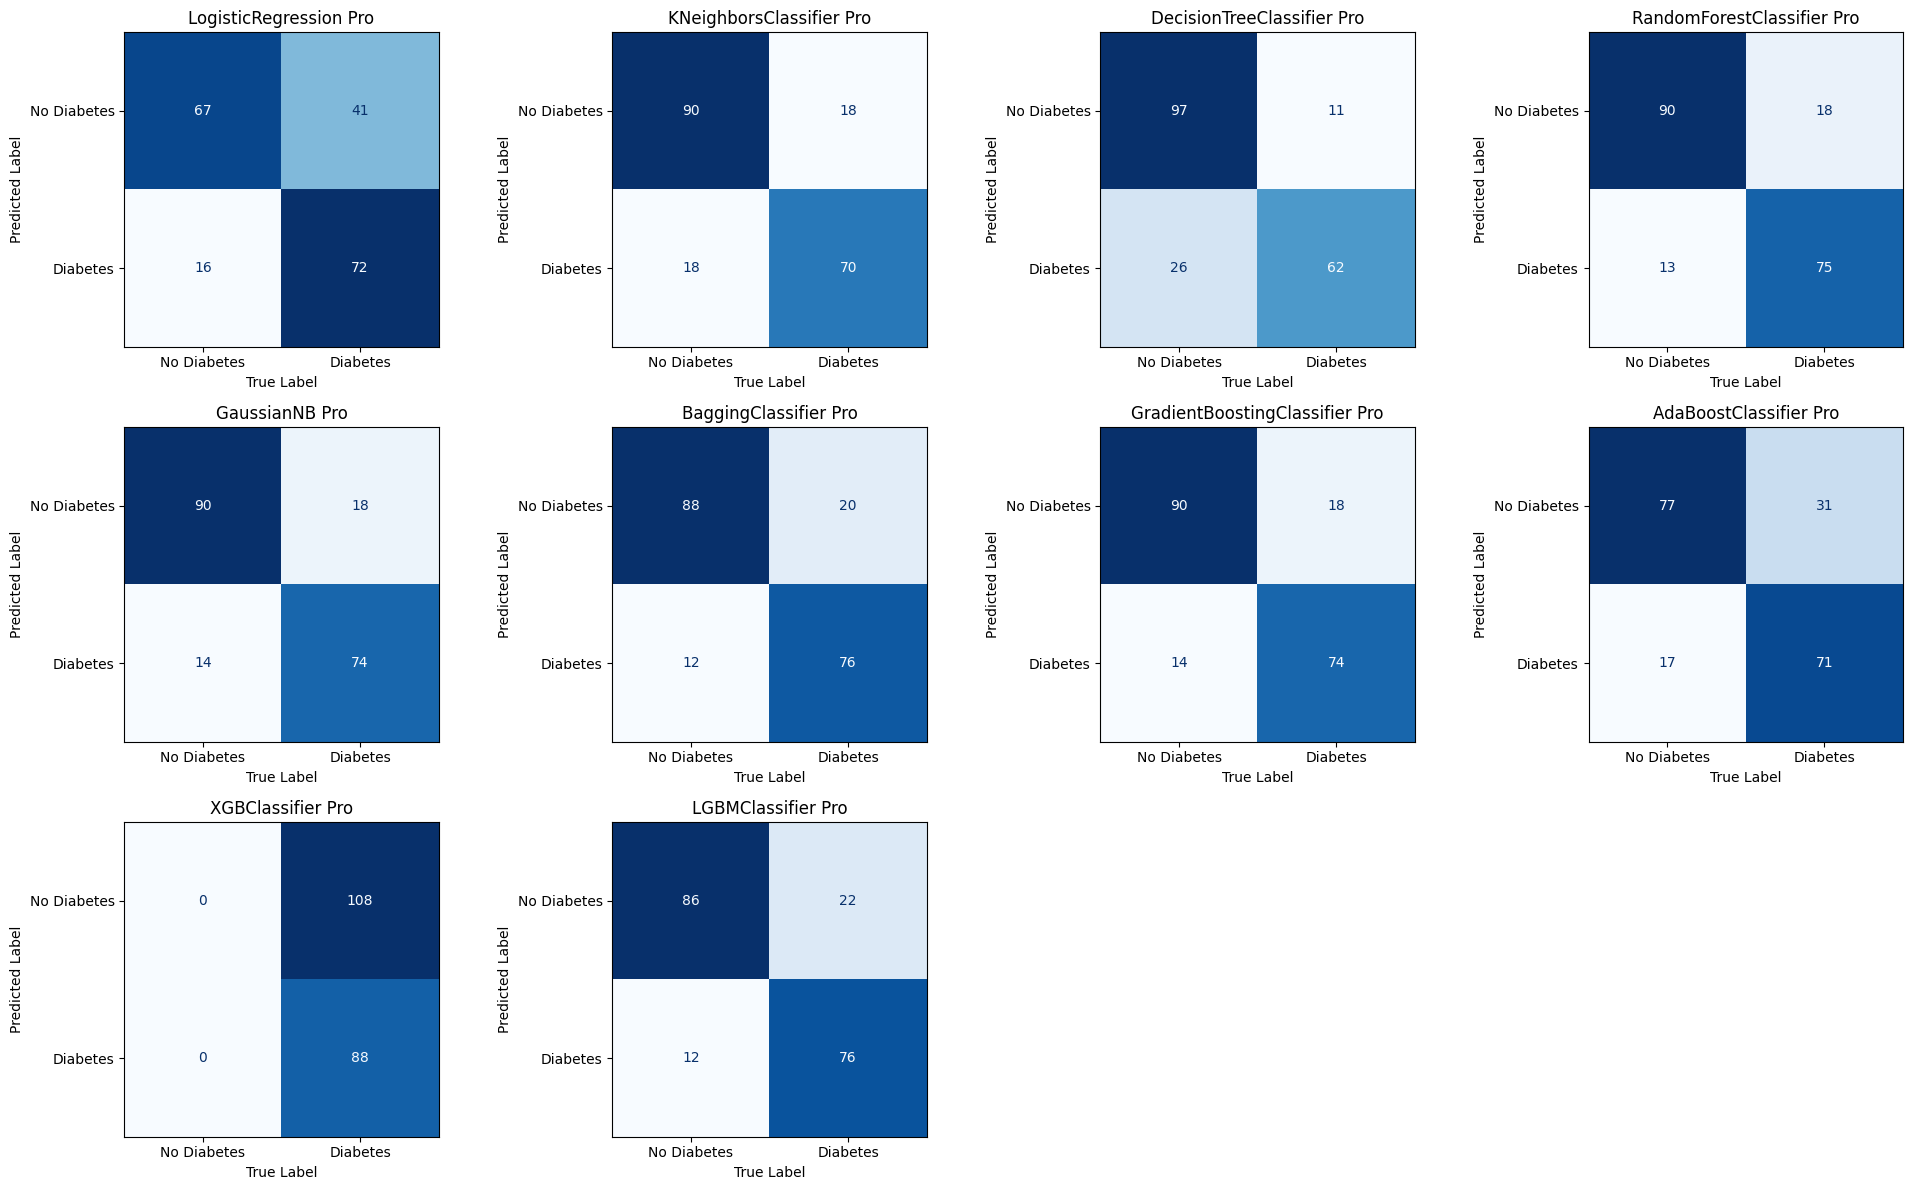

In [9]:
f.display_confusion_matrix(proba_predictions_dict_pro ,labels=['No Diabetes', 'Diabetes'], cmap='Blues', models_per_row=4)

#### ROC Curve

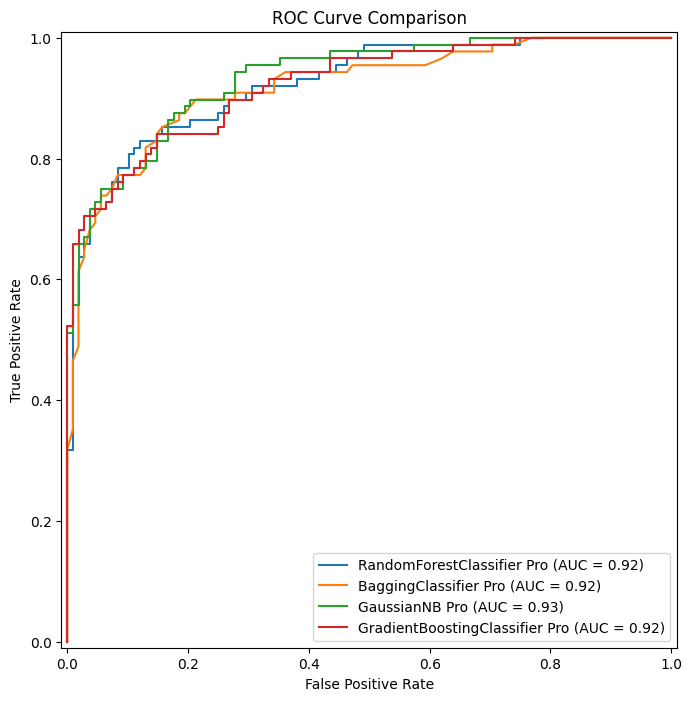

In [17]:
f.display_roc_curves(proba_predictions_dict_pro, models=['RandomForestClassifier Pro', "BaggingClassifier Pro", "GaussianNB Pro", "GradientBoostingClassifier Pro"])

#### Precision-Recall Curve

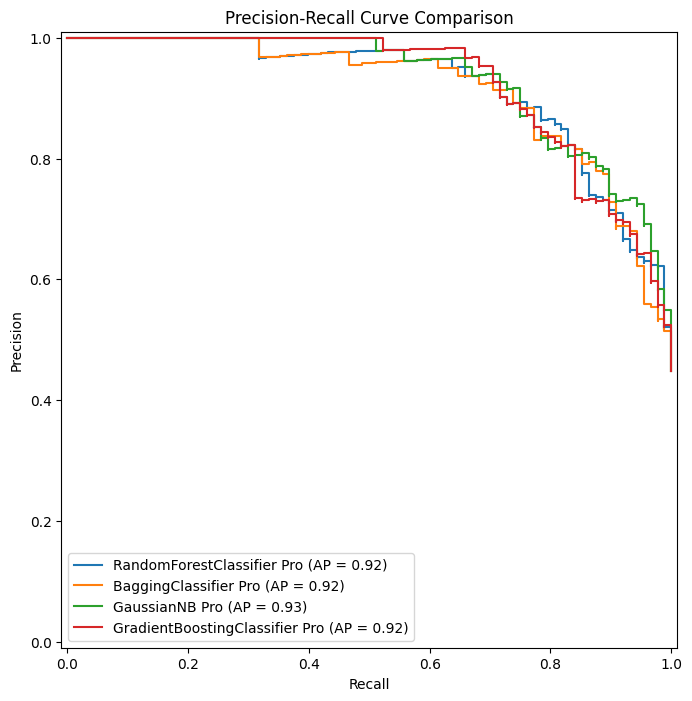

In [18]:
f.display_precision_recall_curve(proba_predictions_dict_pro,models=['RandomForestClassifier Pro', "BaggingClassifier Pro", "GaussianNB Pro", "GradientBoostingClassifier Pro"])

### Model Validation (Pro)

### K-Fold Validation

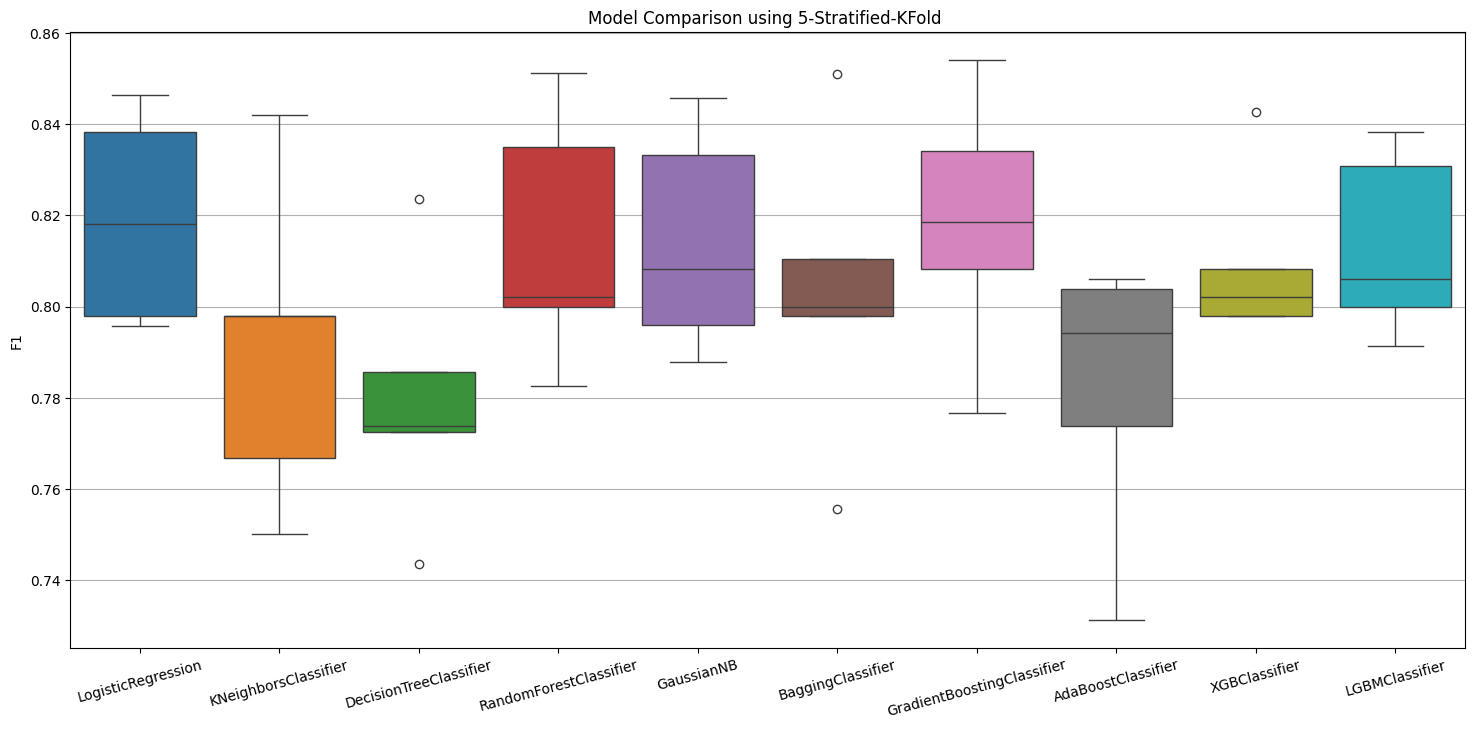

In [19]:
f.evaluate_models_with_kfold(models, df.drop(columns='outcome'), df['outcome'], cv=5, scoring='f1')

### Learning Curve

e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1276, in fit
    self.coef_, self.intercept

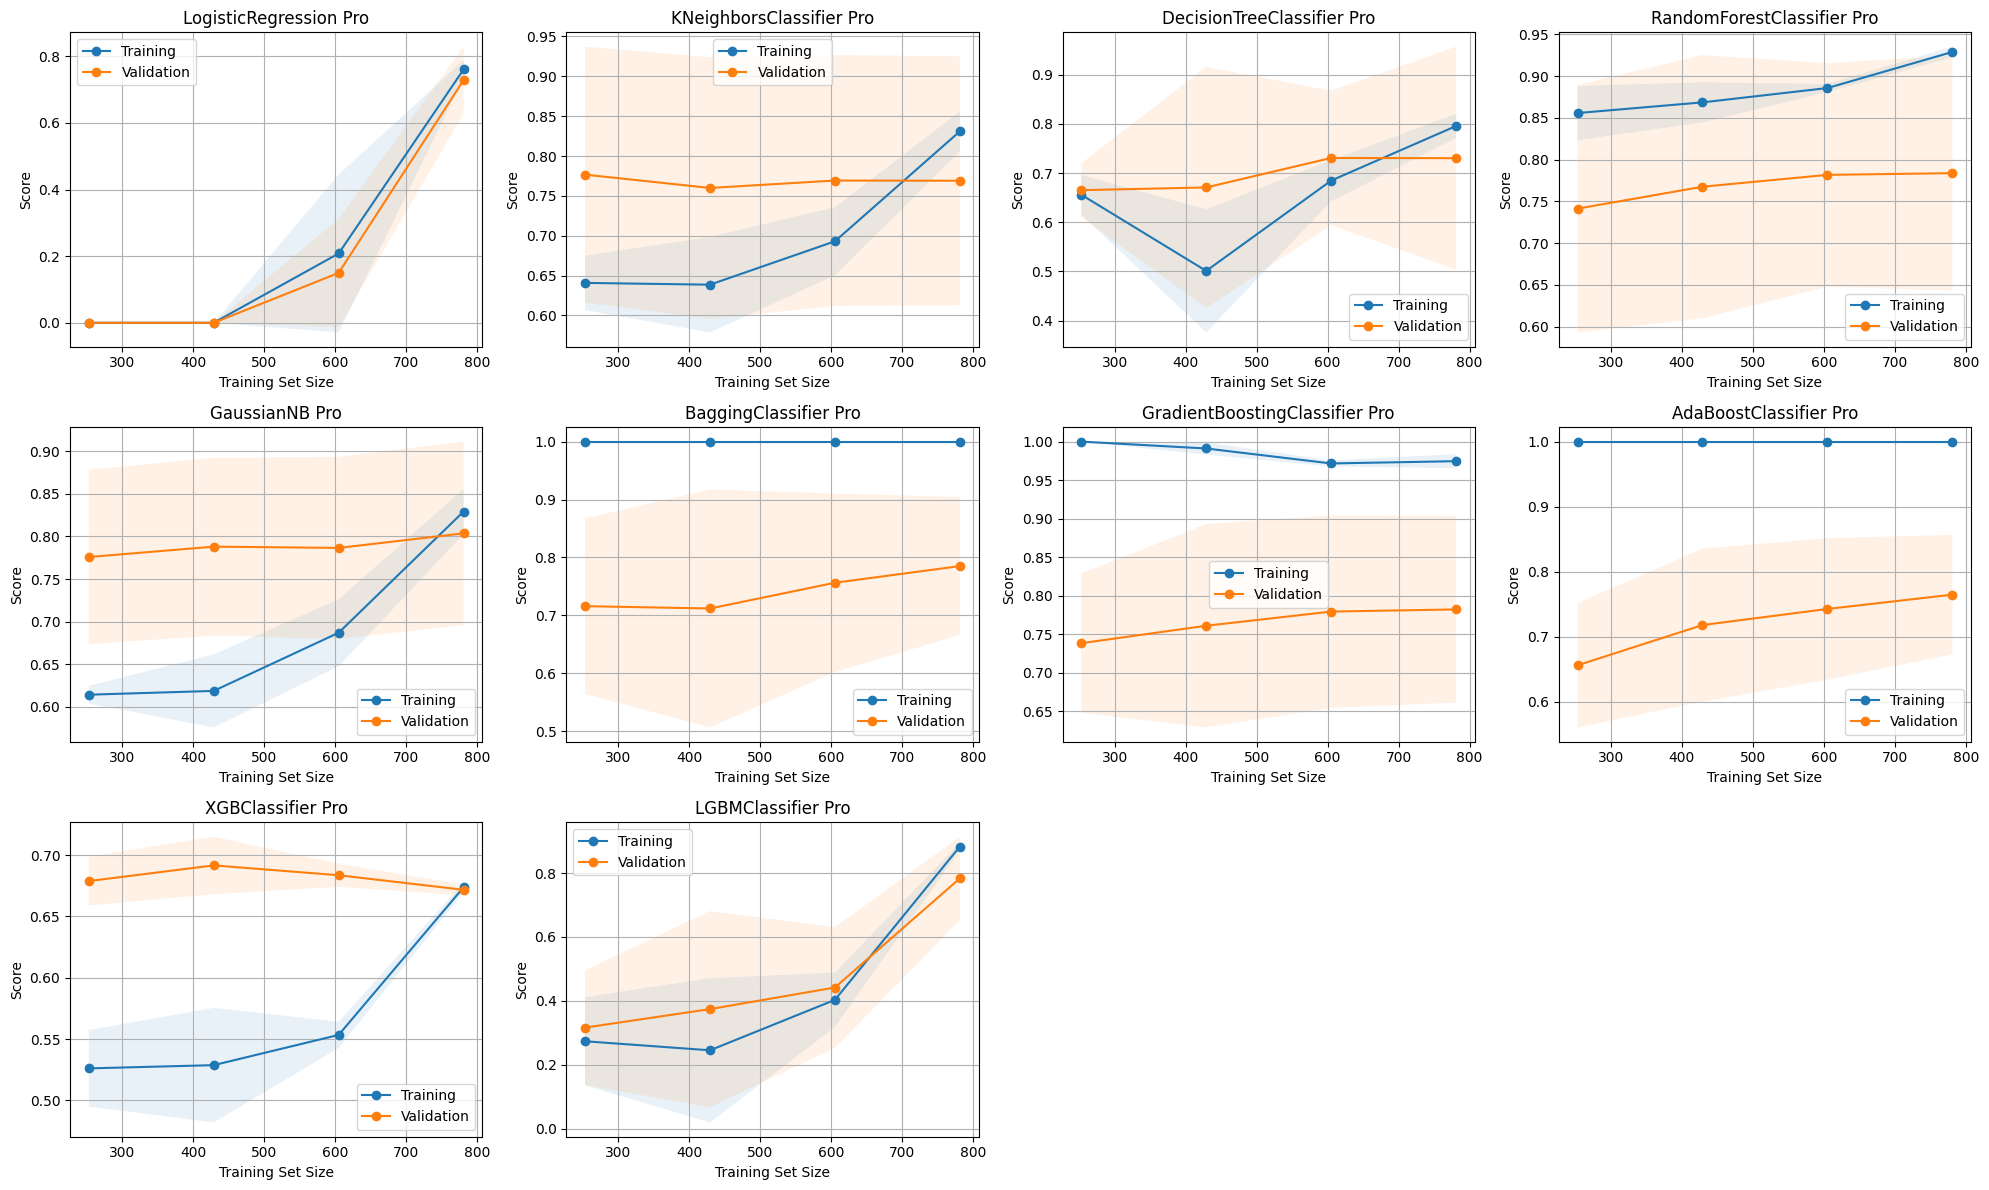

In [12]:
f.plot_learning_curves(models_pro, df.drop(columns='outcome'), df['outcome'], cv=5, scoring='f1', n_jobs=1)

In [24]:
print(models_pro['RandomForestClassifier Pro'])

RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=50)
